#### 实例化一个朴素的 SVM 分类器，并看下其准确率

In [3]:
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

X = digits.data
y = digits.target

#### 显示数据集的几个数字样例

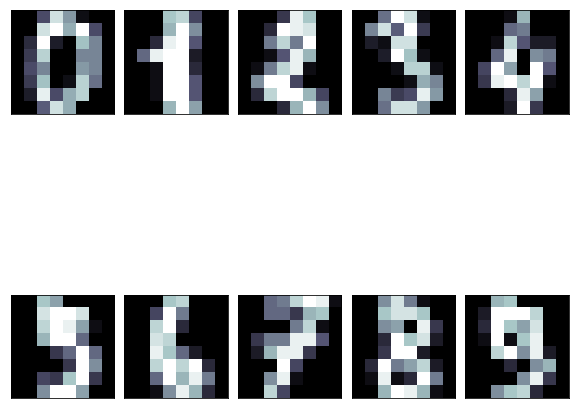

In [4]:
def plot_digits(digits):
    fig, axes = plt.subplots(2, 5, figsize=(10,10),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(digits[i].reshape(8, 8), cmap = 'bone')
    plt.show()
    
    
# 可视化几个数字样例
example_digits = X[:10]
plot_digits(example_digits)

#### SVM重要超参数

参数  |  说明 
:-: | :-
**penalty**|字符串，可选'l1'或'l2'，默认'l2'，指定模型的正则方式
**loss**| 字符串，可选'hinge'或'squared_hinge'，默认'squared_hinge'，用于指定模型的损失函数
**kenel**| 字符串，可选'linear','poly','rbf','sigmoid','precomputed
**degree**| 整型数字，当使用多项式核时，用来确定多项式的阶次
**dual**| 布尔值，默认值为'True'，选择算法以解决双优化或原始优化问题
**tol**| 浮点数，默认为 1e-4，用于判断是否停止迭代的容差
**C**| 浮点数， 默认为1.0，容错空间系数，用于调整容错空间在优化迭代中所占的重要性
**multi_class**| 字符串，可选'ovr'和'crammer_singer'，但面临多分类问题时，用于确定多分类策略，'ovr'指定了使用 One VS Rest 策略进行多分类任务,而'crammer_singer'则是在所有的类上建立一个联合的目标损失函数进行优化
**verbose**| 整型数字，默认值为0，若为大于0的整数，则会在训练过程中不断输入与训练相关的条件与参数
**max_iter**| 整型数字，默认值为1000，用于指定迭代的最大次数

#### 调参前的SVM

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 233)

In [6]:
%%time
svc = SVC()
svc.fit(X_train, y_train)
print('Accuracy: ', svc.score(X_test, y_test))

Accuracy:  0.39111111111111113
Wall time: 321 ms


#### 调参后的SVM

In [7]:
%%time
svc2 = SVC(C=10000, kernel='rbf', gamma=0.001)
svc2.fit(X_train, y_train)
print('Accuracy: ', svc2.score(X_test, y_test))

Accuracy:  0.9911111111111112
Wall time: 99 ms


#### 与其他分类器性能比较
* KNN
* LogisticRegression

In [9]:
%%time
# KNN

from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(3, 11)],
        'p': [i for i in range(1, 4)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(3, 11)],
        'p': [i for i in range(1, 4)]
    }
]

knn_gs_clf = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, n_jobs=-1)
knn_gs_clf.fit(X_train, y_train)
print('Accuracy: ', knn_gs_clf.score(X_test, y_test))

Accuracy:  0.9866666666666667
Wall time: 20.2 s


In [10]:
%%time
# LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
print('Accuracy: ', log_clf.score(X_test, y_test))

Accuracy:  0.9377777777777778
Wall time: 132 ms
